<a href="https://colab.research.google.com/github/FelipeFlorezO/Algebra-Aplicada/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cálculo de Pi mediante el Método de Monte Carlo **

Se calcula una aproximación de π con el método de Monte Carlo empleando función random y teniendo en cuenta:



*   Si U es una variable aleatoria binaria en el cuadrado centro en el origen (-1,1), entonces la probabilidad de que U carga en cualquier subconjunto B que pertenezca a (-1,1) es igual al área de B
*   Si U1, U2, ..., Un son variables aleatorias independientes e identicamente distribuidas del tipo U entonces, conforme el valor de n crece, la fracción que cae en B converge a la probabilidad de caer en B.
*   Para un circulo, se toma en consideracion el area
*   π puede expresarse en terminos del area de un circulo inscrito en (-1,1) como
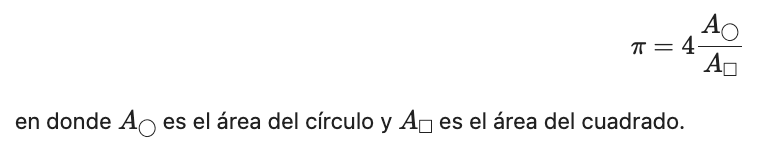

Iniciamos importando las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ahora definimos la función punto(), la cual lanza un punto aleatorio en el cuadrado (-1,1) e indica si el punto está dentro o fuera del cículo. La función también devuelve las coordenadas del punto.

In [2]:
def punto():
  coordenadas = [np.random.uniform(-1,1), np.random.uniform(-1,1)]
  return coordenadas[0]**2 + coordenadas[1]**2 < 1, coordenadas

Ahora construimos una nueva función llamada aproxPi() que lanza n puntos, determina cuántos cayeron dentro del círculo, calcula π y genera varias listas con las coordendas x, y de los puntos que cayeron dentro y fuera.

In [3]:
def aproxPi(n):
  dentro = 0
  Xdentro = []
  Ydentro = []
  Xfuera = []
  Yfuera = []
  for i in range(n):
    estado, coordenadas = punto()
    if estado:
      dentro+=1
      Xdentro.append(coordenadas[0])
      Ydentro.append(coordenadas[1])
    else:
      Xfuera.append(coordenadas[0])
      Yfuera.append(coordenadas[1])
  return 4 * dentro/n , Xdentro, Ydentro, Xfuera, Yfuera

Ahora llamamos a la función aproxPi() para calcular un valor aproximado de pi, empleando 1000000 puntos y graficamos los resultados

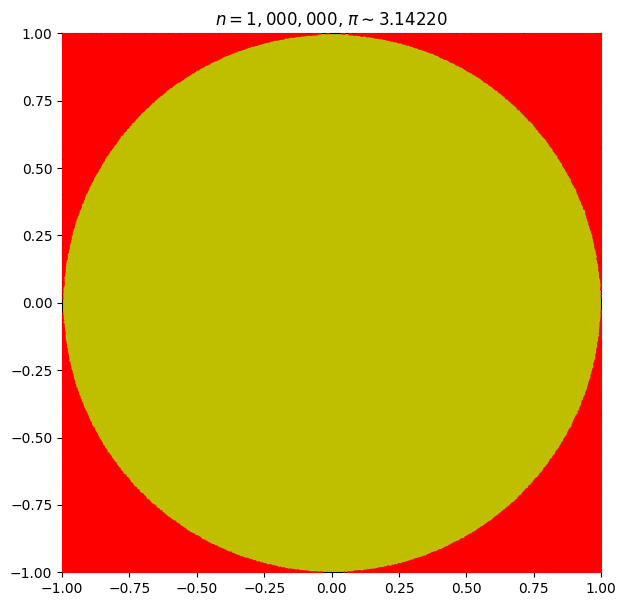

In [19]:
n=1000000
π=aproxPi(n)

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.set_aspect('equal')

circulo = plt.Circle((0, 0), 1, color='0.95', fill=True, zorder=1)
ax.add_artist(circulo)
ax.scatter(π[1],π[2], s=0.2, c='y', marker="x", zorder=2)
ax.scatter(π[3],π[4], s=0.2, c='r', marker="x", zorder=3)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'$n={n:0>9,}$, $\pi \sim {π[0]:0<7.5}$')
plt.show()